In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
columns = ["feature1", "feature2"]
data = pd.read_csv("question3.csv", names=columns)

In [3]:
print(data)

     feature1   feature2
0     2.49650  -3.500600
1   -13.46300  -5.274300
2    -5.81940 -11.455000
3     4.36030  -1.850600
4     0.83483 -11.243000
..        ...        ...
995   6.20470  -9.753200
996  12.46200  -8.130800
997  -4.73910  -0.014855
998  -5.40210 -12.536000
999  -1.78460 -14.538000

[1000 rows x 2 columns]


/dev1/genomeGPT/anaconda3/envs/optinum/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


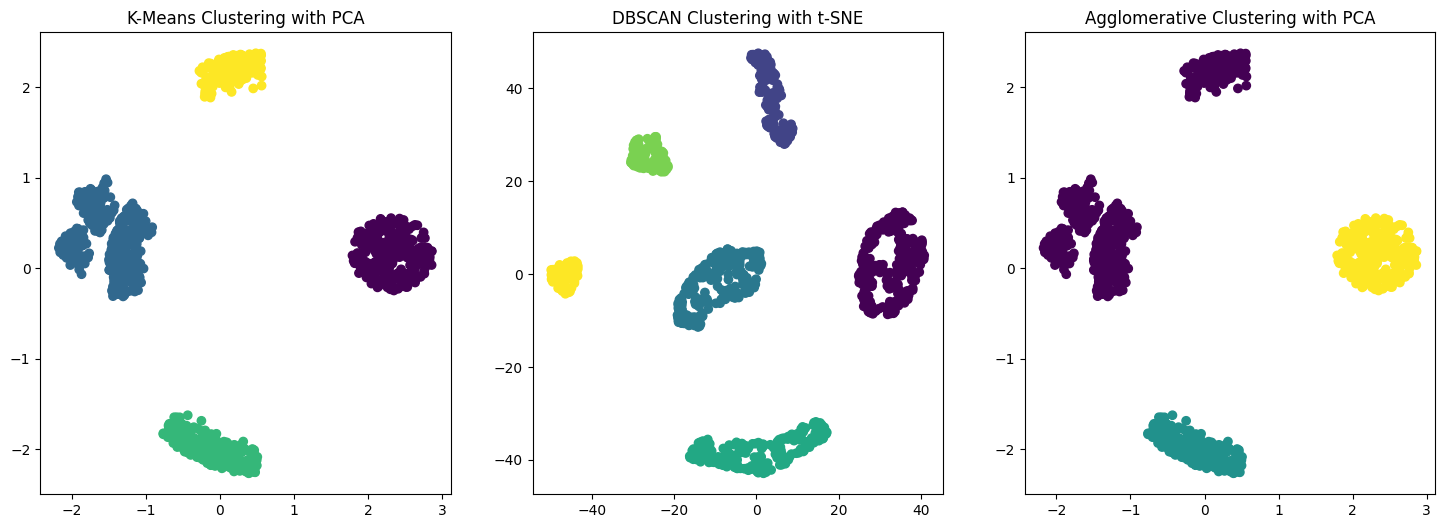

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# PCA and tsne for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)


#clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Labels'] = kmeans.fit_predict(data_scaled)
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Labels'] = dbscan.fit_predict(data_scaled)
# Apply Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
data['Agglomerative_Labels'] = agglomerative.fit_predict(data_scaled)


# Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['KMeans_Labels'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.subplot(1, 3, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['DBSCAN_Labels'], cmap='viridis')
plt.title('DBSCAN Clustering with t-SNE')
plt.subplot(1, 3, 3)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Agglomerative_Labels'], cmap='viridis')
plt.title('Agglomerative Clustering with PCA')
plt.show()